In [17]:
from __future__ import print_function
import pickle 
import numpy as np
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from torch.autograd import Variable
from skimage.transform import rotate

In [3]:
trainset_imoprt = pickle.load(open("train_labeled.p", "rb"))
validset_import = pickle.load(open("validation.p", "rb"))
train_loader = torch.utils.data.DataLoader(trainset_imoprt, batch_size=64, shuffle=True)
valid_loader = torch.utils.data.DataLoader(validset_import, batch_size=64, shuffle=True)
images,labels = iter(train_loader).next()
import matplotlib.pyplot as plt
%matplotlib inline
def imshow(img):
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))

Files already downloaded
3000
750


In [11]:
images_numpy=images.numpy()

In [33]:
images_translated_np = np.zeros((64,1,28,28))

In [34]:
#Translation
def horizontal_translation(nparray_2d,pixels):
    m,n = nparray_2d.shape
    if pixels>0:
        big_array= np.zeros((m,n+pixels))
        big_array[:,pixels:] = nparray_2d
        return big_array[:,:n]
    else:
        big_array = np.zeros((m,n-pixels))
        big_array[:,:pixels] = nparray_2d
        return big_array[:,-pixels:]
    
def vertical_translation(nparray_2d,pixels):
    m,n = nparray_2d.shape
    if pixels>0:
        big_array= np.zeros((m+pixels,n))
        big_array[pixels:,:] = nparray_2d
        return big_array[:m,:]
    else:
        big_array = np.zeros((m-pixels,n))
        big_array[:pixels,:] = nparray_2d
        return big_array[-pixels:,:]

In [35]:
for i,image in enumerate(images_numpy):
    image_toRotate = image[0]
    image_rotated = horizontal_translation(image_toRotate,4)
    images_translated_np[i][0] = image_rotated

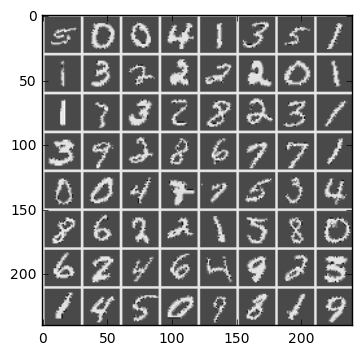

In [36]:
import torchvision
imshow(torchvision.utils.make_grid(images))

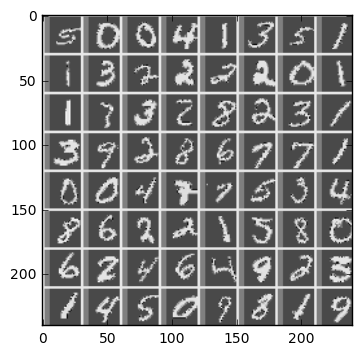

In [37]:
images_translated = torch.from_numpy(images_translated_np)
imshow(torchvision.utils.make_grid(images_translated))